## An Analysis of the olympics data in the past 120 years.

The data set contains basic bio data on athletes and medal results from Athens 1896 to Rio 2016.<br>

The kaggle dataset can also be found at- https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datasets
df_athletes= pd.read_csv(r"./data/athlete_events.csv")
df_countries=pd.read_csv(r"./data/noc_regions.csv")
df_athletes.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df_countries.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
#merging the data because the two data sources are containing the countries and athlete data seperately.
df=df_athletes.merge(df_countries, how="left", on="NOC")
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [79]:
#using the set option to only display 10 rows at a time when the data frame is called.
pd.set_option("display.max_rows",10)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [80]:
df.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
           ...  
Sport         66
Event        765
Medal          3
region       205
notes         21
Length: 17, dtype: int64

In [81]:
#data cleaning 
df=df.drop_duplicates()
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [82]:
#since notes column is mostly empty, it can be removed from the analysis
df=df.drop(columns= {"notes"})
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [83]:
#winter sports
winter_sports=df[df.Season=="Winter"].Sport.unique()
winter_sports



array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [84]:
#summer sports
summer_sports=df[df.Season=="Summer"]
summer_sports.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [85]:
#filtering the data on the best athletes of olympics history 
top_atheletes = df.groupby(['Name','Sex'])['Medal'].count().sort_values(ascending = False)
top_atheletes.head(10)

Name                                             Sex
Michael Fred Phelps, II                          M      28
Larysa Semenivna Latynina (Diriy-)               F      18
Nikolay Yefimovich Andrianov                     M      15
Takashi Ono                                      M      13
Ole Einar Bjrndalen                              M      13
Borys Anfiyanovych Shakhlin                      M      13
Edoardo Mangiarotti                              M      13
Natalie Anne Coughlin (-Hall)                    F      12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  F      12
Ryan Steven Lochte                               M      12
Name: Medal, dtype: int64

In [86]:
#10 oldest people to win gold
oldgold = df[df['Medal']=='Gold'][['Name','Age','Sport']].sort_values('Age',ascending=False)
oldgold.head(10)

,Name,Age,Sport
233390,Oscar Gomer Swahn,64.0,Shooting
105199,Charles Jacobus,64.0,Roque
104003,Isaac Lazarus Israls,63.0,Art Competitions
261102,"Robert W. Williams, Jr.",63.0,Archery
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",63.0,Archery
226374,"Galen Carter ""G. C."" Spencer",63.0,Archery
233386,Oscar Gomer Swahn,60.0,Shooting
233387,Oscar Gomer Swahn,60.0,Shooting
261675,Walter Winans,60.0,Art Competitions
159298,Joshua Kearney Millner,60.0,Shooting


In [87]:
#sort countries by medal count
medal_count = df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
medal_count

NOC
USA    5637
URS    2503
GER    2165
GBR    2067
FRA    1767
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64

## Sri Lankan Athletes in olympics

In [ ]:
#get data on srilankan athletes on olympics
sl_athletes=df[df["region"]=="Sri Lanka"]
sl_athletes.head()

NameError: name 'df' is not defined

In [89]:
##filtering data on who has won medals from srilanka
slsl=sl_athletes.fillna("")
slsl[slsl["Medal"]!=""]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
106998,54081,Kameradin Susanthika Jayasinghe,F,24.0,168.0,62.0,Sri Lanka,SRI,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 200 metres,Silver,Sri Lanka
259663,129989,Duncan M. White,M,30.0,,,Sri Lanka,SRI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's 400 metres Hurdles,Silver,Sri Lanka


### Top countries with Olympic Medals.

<Axes: title={'center': 'Top 10 countries with Olympic medals'}, xlabel='countries', ylabel='number of Medals'>

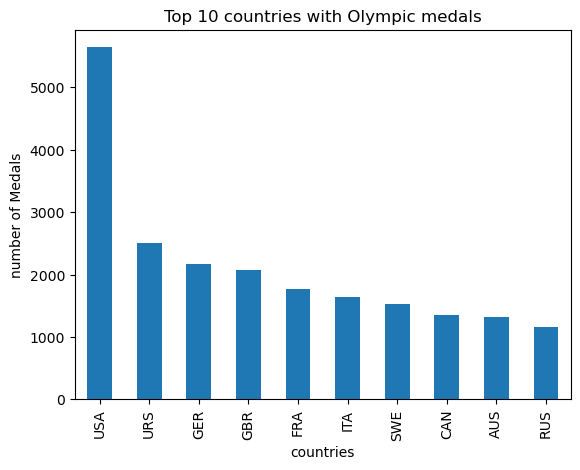

In [90]:
#Top 10 countires with olympic medals

medal_count.plot(kind="bar",title="Top 10 countries with Olympic medals",xlabel="countries",ylabel="number of Medals")

<Axes: title={'center': 'Top 10 countries that has won gold medals'}, ylabel='region'>

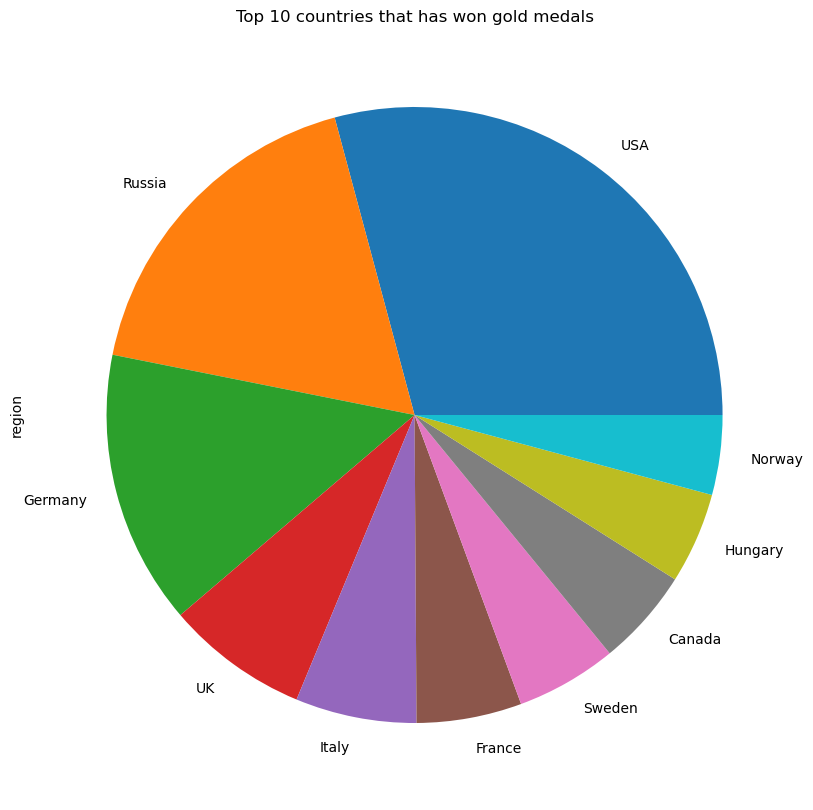

In [91]:
#getting best gold medal countries
goldmedals=df[df.Medal=="Gold"]
gsum=goldmedals.region.value_counts().head(10)
gsum.plot(kind="pie",figsize=(10,10),title="Top 10 countries that has won gold medals")


### Age Distributions

<Axes: title={'center': 'Athletes Age Distribution'}, xlabel='Age', ylabel='Number'>

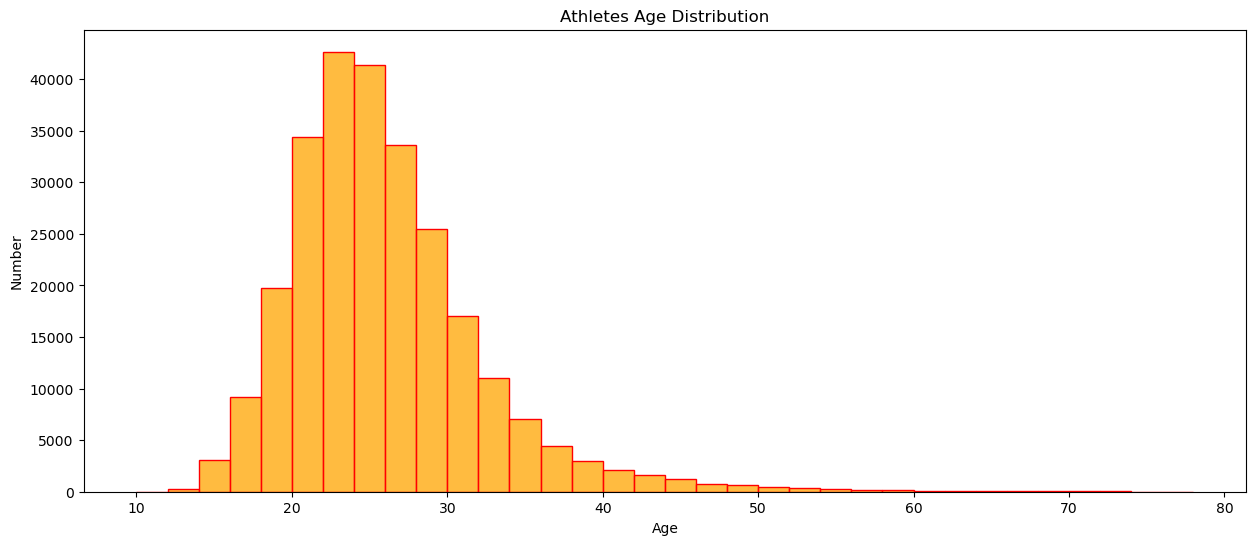

In [92]:
#age distribution histogram using seaborn
plt.figure(figsize=(15,6))
plt.title('Athletes Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
sns.histplot(data=df, x='Age',bins=np.arange(10,80,2), color="orange",edgecolor='red')

In [93]:
sport_gender_avg=df.groupby(["Sport","Sex"])["Age"].mean()
sport_gender_avg

Sport          Sex
Aeronautics    M      26.000000
Alpine Skiing  F      22.334609
               M      23.758266
Alpinism       F      43.000000
               M      38.533333
                        ...    
Water Polo     M      25.736542
Weightlifting  F      24.028078
               M      25.710832
Wrestling      F      25.305921
               M      25.821827
Name: Age, Length: 116, dtype: float64

<Axes: >

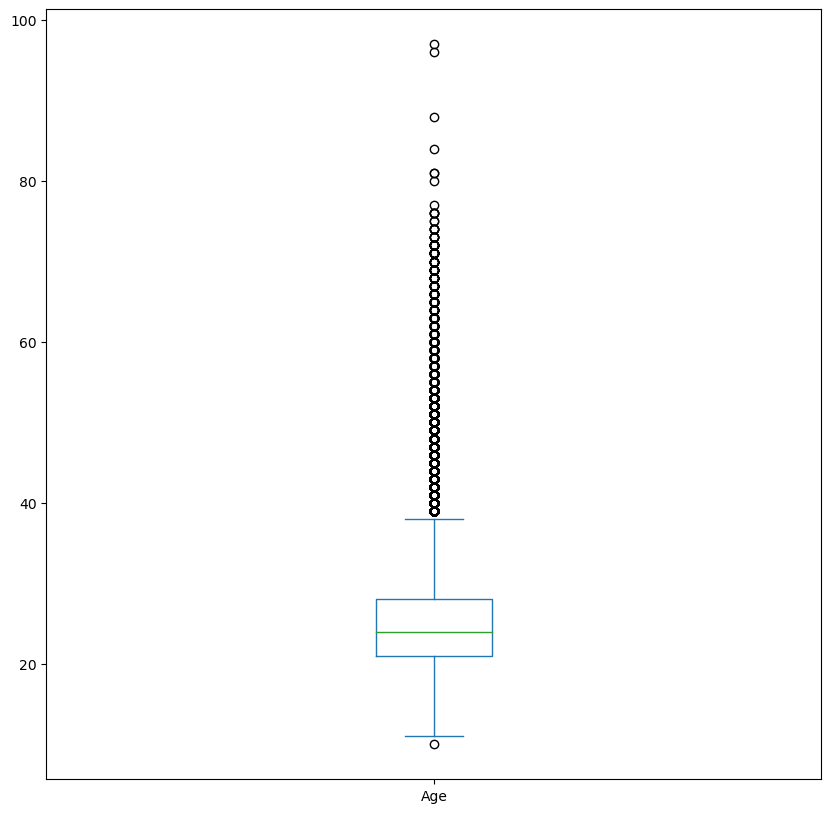

In [94]:
df["Age"].plot(kind="box",figsize=(10,10))

Most of the athletes are between the ages of 20-30 who compete for olympics.

### Male-Female Demographics in olympics

In [95]:
#male female atheletes of all time in olympics
df.Sex.value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

<Axes: ylabel='Sex'>

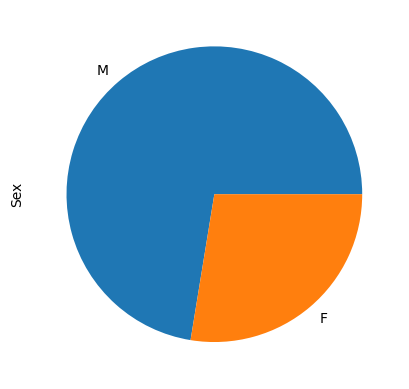

In [96]:
df.Sex.value_counts().plot(kind="pie")

In [97]:
#women in olympics
women=df[(df.Sex == "F")] 


Text(0.5, 1.0, 'Variation in number of Female Athletes over time')

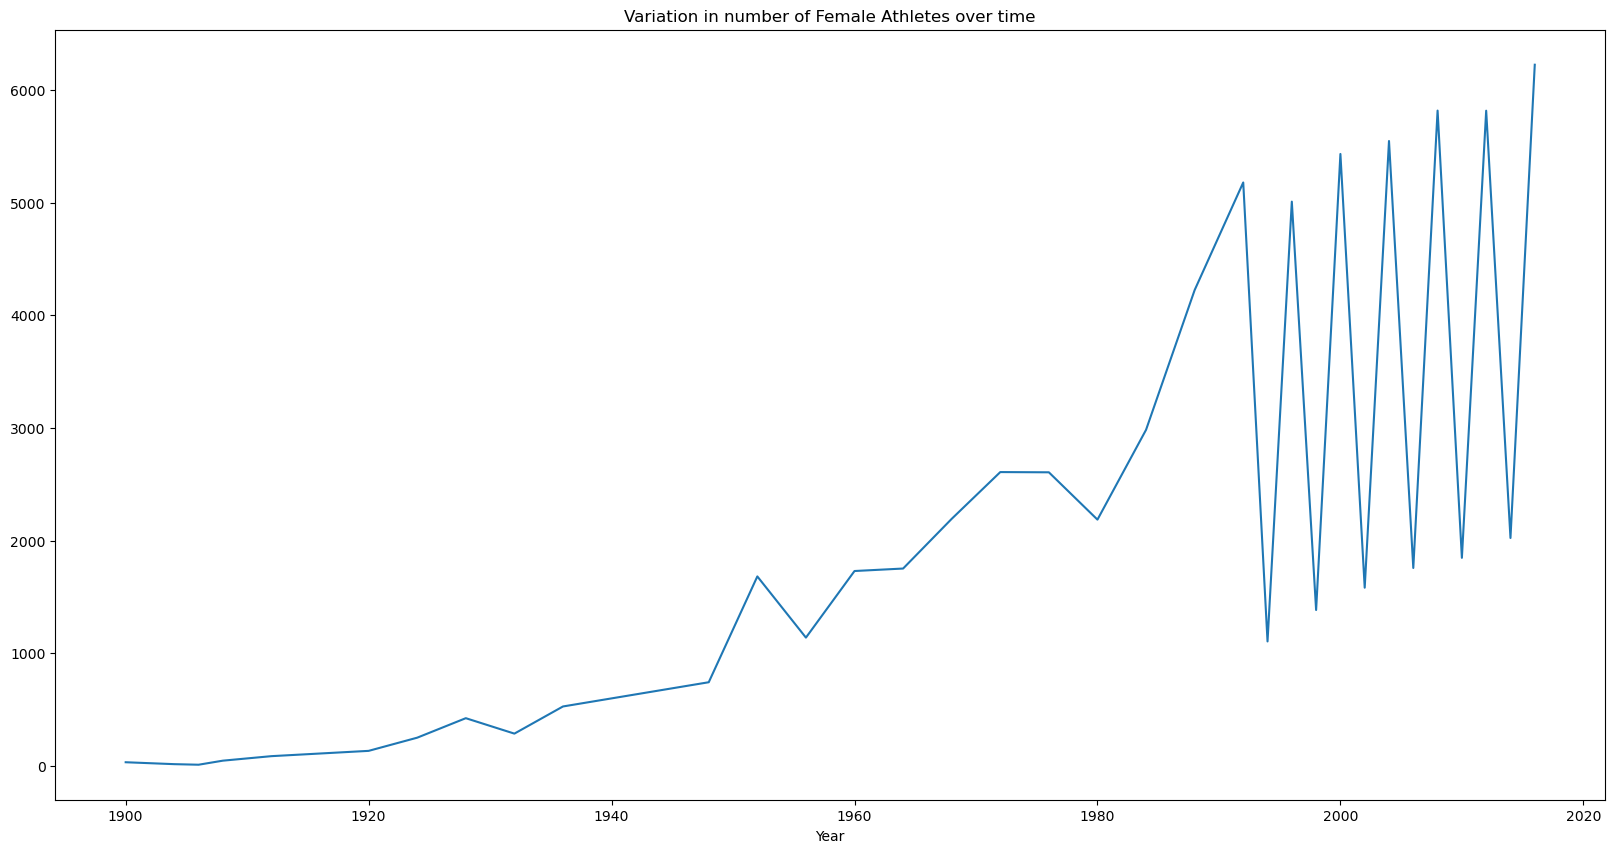

In [98]:
#female participation rates in olmpics
wparticipation = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
wparticipation.loc[:,'F'].plot()
plt.title('Variation in number of Female Athletes over time')

Text(0.5, 1.0, 'Number of Medals secured by womens in  olympic in each year')

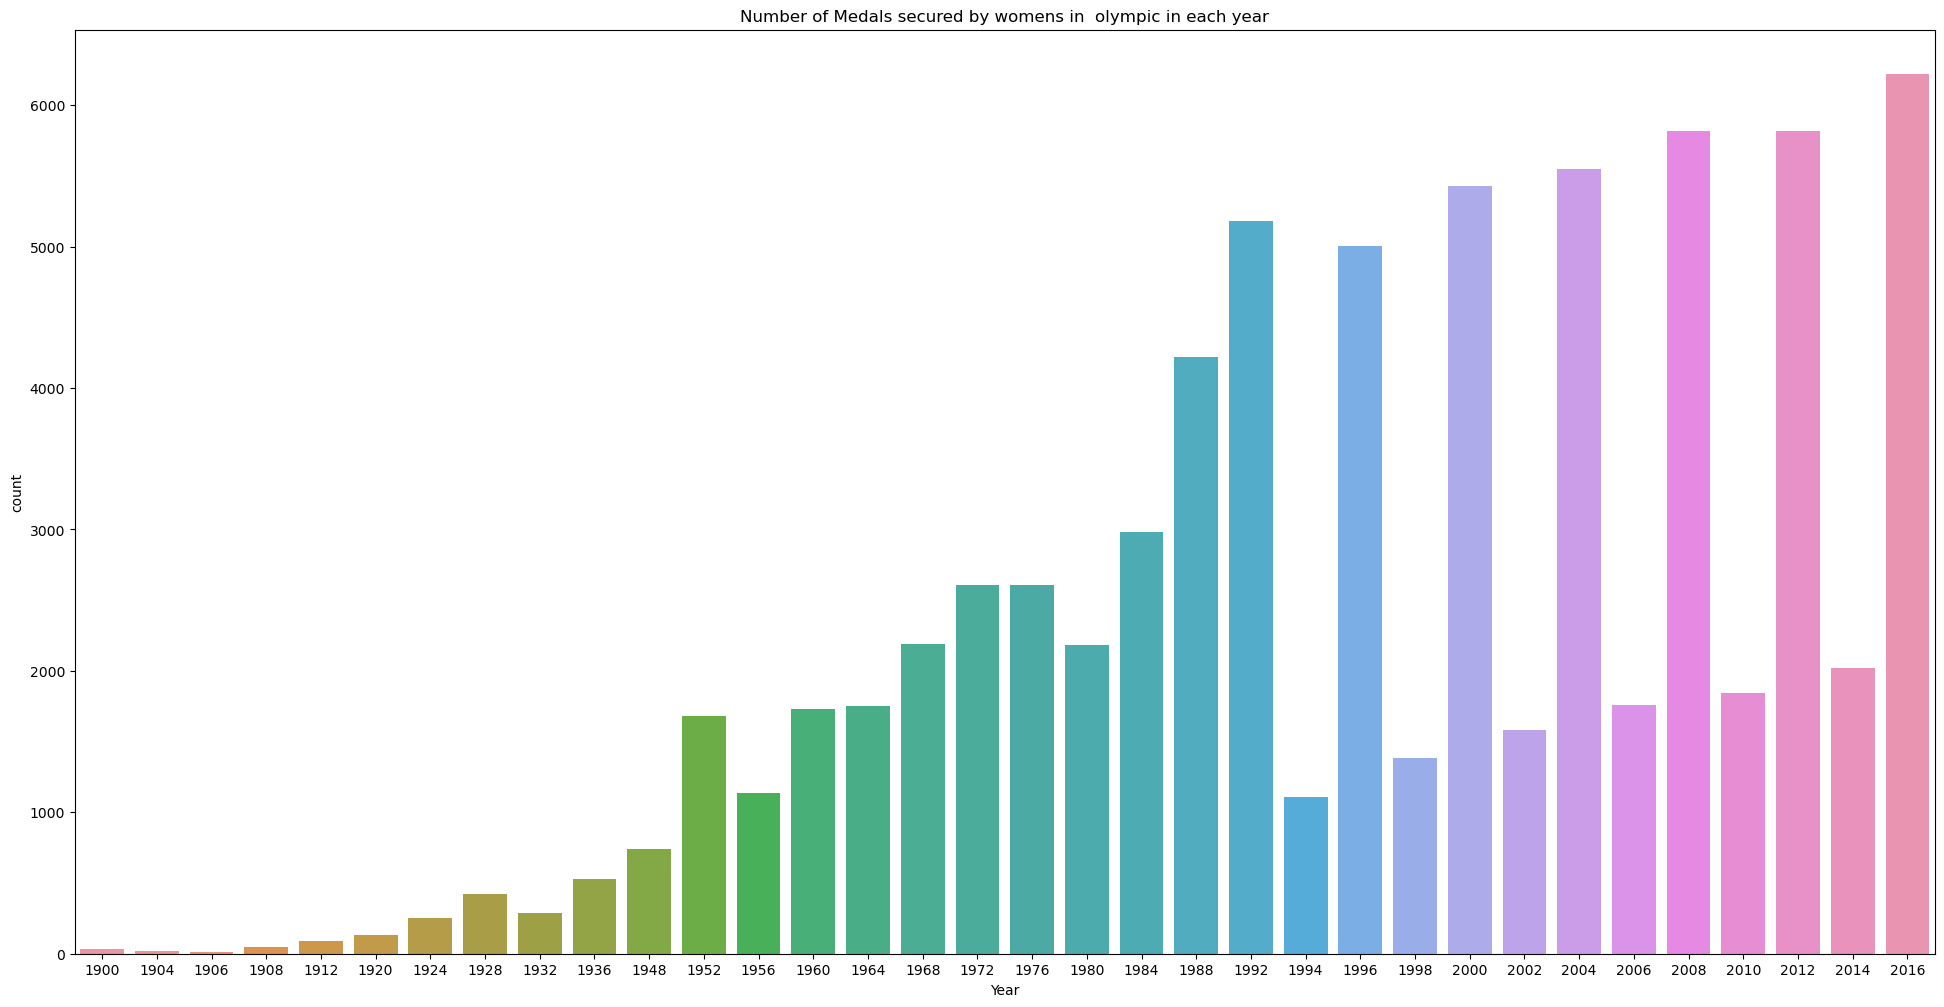

In [99]:
#number of medals secured by women each year
plt.figure(figsize=(24,12))
sns.countplot(data=women , x = 'Year')
plt.title("Number of Medals secured by womens in  olympic in each year")

female participation and the medals wom each year by women has steadily increased each year!

Text(0.5, 1.0, 'Variation in number of Male Athletes with time')

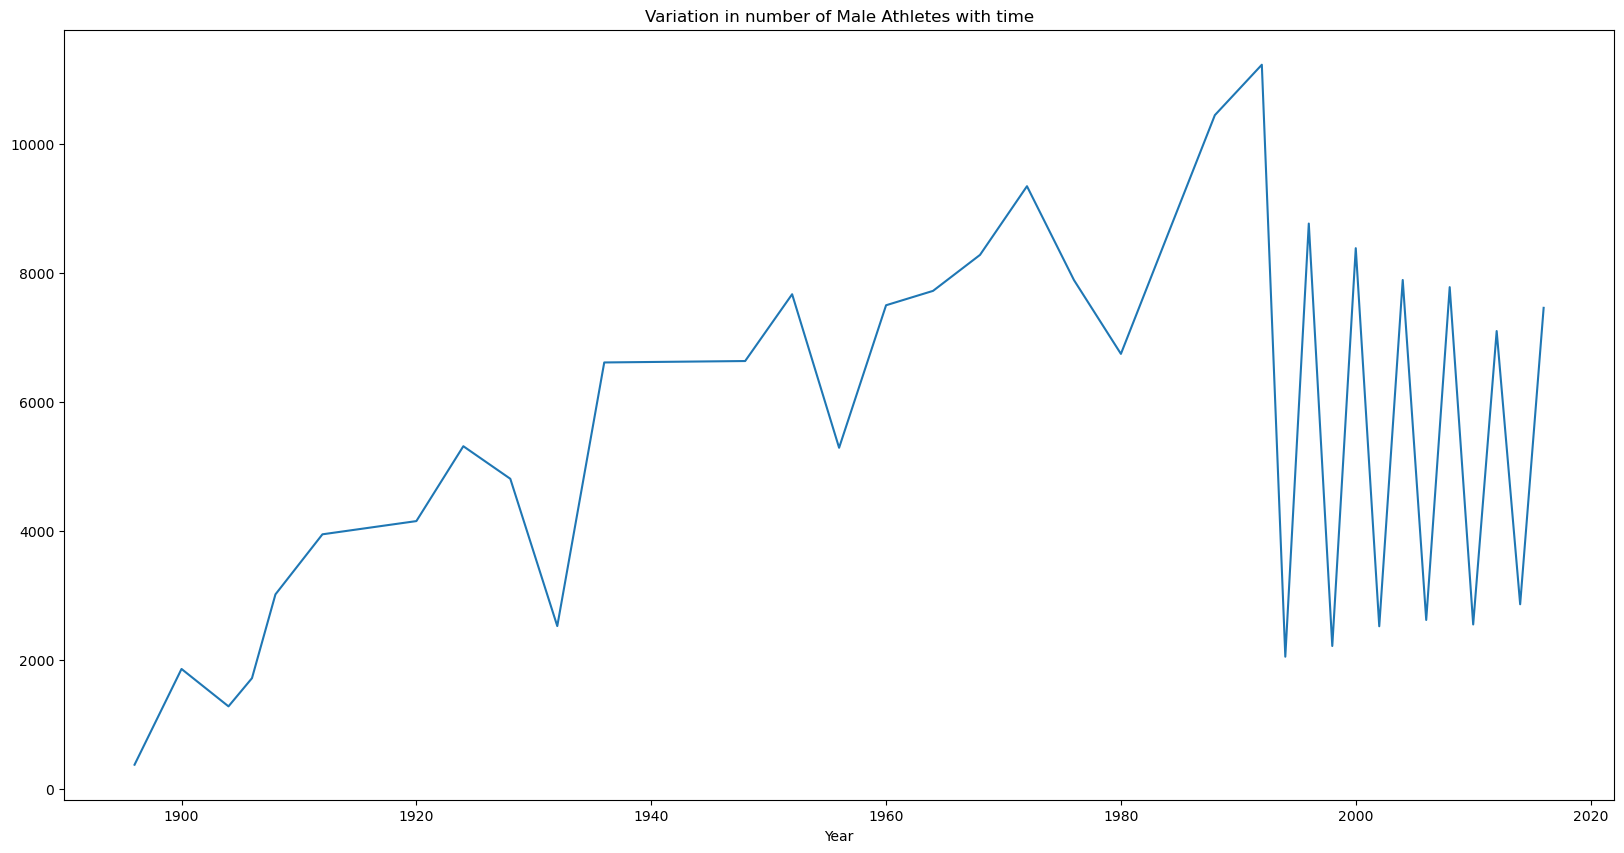

In [100]:
men=df[(df.Sex == "M")] 
Mpart = men.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
Mpart.loc[:,'M'].plot()
plt.title('Variation in number of Male Athletes with time')

### An analysis of Rio Olympics(2016)

In [101]:
# Analysis Rio Olympic in 2016
df_rio = df[df['Year']==2016]
df_rio

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271024,135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,NaN,Germany
271053,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Kazakhstan
271054,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN,Kazakhstan
271055,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Kazakhstan


In [102]:
top_10 = df_rio.groupby('Team')[['Medal']].count()
top_10val=top_10.sort_values('Medal',ascending=False).head(10)

<Axes: ylabel='Team'>

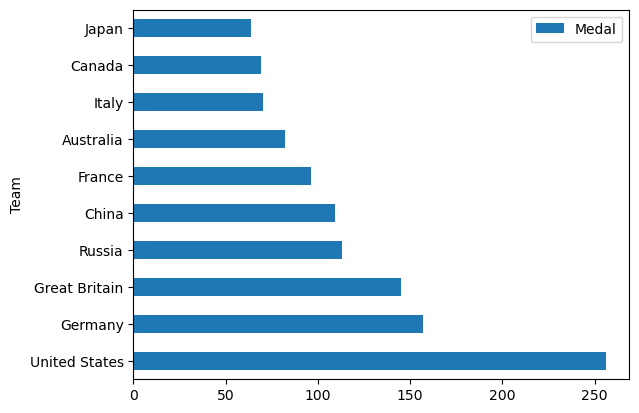

In [103]:
top_10val.plot.barh()